# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [391]:
import matplotlib.pyplot as plt
#import mplleaflet
import pandas as pd

#def leaflet_plot_stations(binsize, hashid):
#
    #df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

 #   station_locations_by_hash = df[df['hash'] == hashid]

  #  lons = station_locations_by_hash['LONGITUDE'].tolist()
   # lats = station_locations_by_hash['LATITUDE'].tolist()

    #plt.figure(figsize=(8,8))

 #   plt.scatter(lons, lats, c='r', alpha=0.7, s=200)
#
  #  return mplleaflet.display()

#leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [392]:

import numpy as np

In [393]:
df=pd.read_csv(r'C:\Users\AMIRAND8\Desktop\ALAN\Data\ApliedPlotting&DataRepresentation\fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [394]:
df.head()

,ID,Date,Element,Data_Value
0,USC00202308,1/1/2005,TMAX,150
1,USC00205822,1/1/2005,TMIN,-17
2,USC00202308,1/1/2005,TMIN,-17
3,USC00203712,1/1/2005,TMAX,144
4,USC00203712,1/1/2005,TMIN,-50


In [395]:
df_high = df[df['Element'] == 'TMAX']

df_low = df[df['Element'] == 'TMIN']

In [396]:
df_high.sort_values(by = 'Date',ascending = True,inplace = True)
#df_high.set_index('Date', inplace = True)


C:\Users\AMIRAND8\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [397]:
df_low.sort_values(by = 'Date',ascending = True,inplace = True)
#df_low.set_index('Date', inplace = True)

C:\Users\AMIRAND8\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [398]:
df_high['Day']= df_high['Date'].str.split('/', expand=True)[1]
df_high['Month'] = df_high['Date'].str.split('/', expand=True)[0]
df_low['Day']= df_low['Date'].str.split('/', expand=True)[1]
df_low['Month'] = df_low['Date'].str.split('/', expand=True)[0]

C:\Users\AMIRAND8\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\AMIRAND8\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\AMIRAND8\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [399]:
grouped_high = df_high.groupby(['Month','Day']).max()
grouped_high.reset_index(inplace = True)
grouped_low = df_low.groupby(['Month','Day']).min()
grouped_low.reset_index(inplace = True)


In [400]:
grouped_high['Month'] = grouped_high['Month'].astype(int)
grouped_high['Day'] = grouped_high['Day'].astype(int)
grouped_low['Month'] = grouped_low['Month'].astype(int)
grouped_low['Day'] = grouped_low['Day'].astype(int)

In [401]:
grouped_high.sort_values(by = ['Month','Day'],inplace = True)
grouped_high.reset_index(inplace= True)
grouped_low.sort_values(by = ['Month','Day'],inplace = True)
grouped_low.reset_index(inplace= True)

In [402]:
months =['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
pos = np.arange(1,365,365/12).round()

In [403]:
grouped_high.head()

,index,Month,Day,ID,Date,Element,Data_Value
0,0,1,1,USW00094889,1/1/2015,TMAX,156
1,11,1,2,USW00094889,1/2/2015,TMAX,139
2,22,1,3,USW00094889,1/3/2015,TMAX,133
3,25,1,4,USW00094889,1/4/2015,TMAX,106
4,26,1,5,USW00094889,1/5/2015,TMAX,128


C:\Users\AMIRAND8\Documents\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


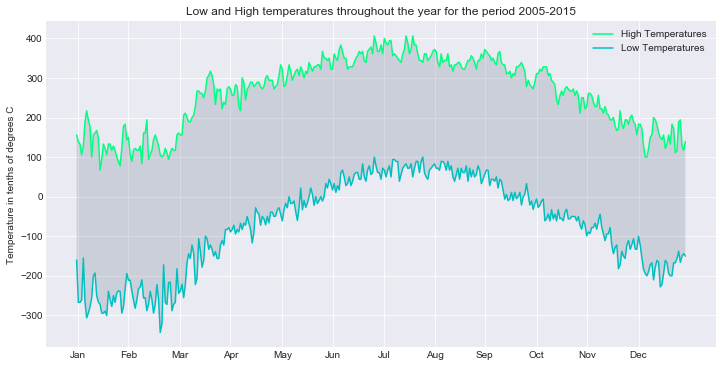

In [404]:
plt.figure(figsize=(12,6))
plt.plot(grouped_high['Data_Value'], c = 'springgreen')
plt.plot(grouped_low['Data_Value'], c = 'c')

plt.style.use('seaborn-darkgrid')

# add a label to the x axis
#plt.xlabel('Month')
# add a label to the y axis
plt.ylabel('Temperature in tenths of degrees C')
# add a title
plt.title('Low and High temperatures throughout the year for the period 2005-2015')

# add a legend (uses the labels from plt.scatter)
plt.legend(['High Temperatures','Low Temperatures'],loc=1, frameon=False)

#Fill space between graphs
plt.gca().fill_between(range(len(grouped_low['Data_Value'])), 
                       grouped_low['Data_Value'], grouped_high['Data_Value'], 
                       facecolor='slategrey', 
                       alpha=0.25)
# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='False', bottom='True', left='True', right='False', labelleft='True', labelbottom='True')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

#set Xticks labels 
# first set the new ticks for the positions of the monthly labels
ax = plt.gca()
ax.set_xticks(pos)
# set the labels
ax.set_xticklabels(months)
    
plt.show()

In [405]:
#Create new dataframe for the 2015 high temperatures
df15_high = df_high[df_high['Date'].str.contains('2015')]
df15_grouped_high = df15_high.groupby(['Month','Day']).max()
df15_grouped_high.reset_index(inplace = True)

In [406]:
#Set month and day as value type Int
df15_grouped_high['Month'] = df15_grouped_high['Month'].astype(int)
df15_grouped_high['Day'] = df15_grouped_high['Day'].astype(int)

In [407]:
#Order dataframe by month and day
df15_grouped_high.sort_values(by = ['Month','Day'],inplace = True)
df15_grouped_high.reset_index(inplace= True, drop = True)

In [408]:
#Select only breaking record high temperatures
df15_grouped_high = df15_grouped_high.where(df15_grouped_high['Data_Value'] >= grouped_high['Data_Value']).dropna()

In [409]:
#Create new dataframe for the 2015 low temperatures
df15_low = df_low[df_low['Date'].str.contains('2015')]
df15_grouped_low = df15_low.groupby(['Month','Day']).min()
df15_grouped_low.reset_index(inplace = True)

In [410]:
#Set month and day as value type Int
df15_grouped_low['Month'] = df15_grouped_low['Month'].astype(int)
df15_grouped_low['Day'] = df15_grouped_low['Day'].astype(int)

In [411]:
#Order dataframe by month and day
df15_grouped_low.sort_values(by = ['Month','Day'],inplace = True)
df15_grouped_low.reset_index(inplace= True, drop = True)

In [412]:
#Select only breaking record high temperatures
df15_grouped_low = df15_grouped_low.where(df15_grouped_low['Data_Value'] <= grouped_low['Data_Value']).dropna()

C:\Users\AMIRAND8\Documents\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


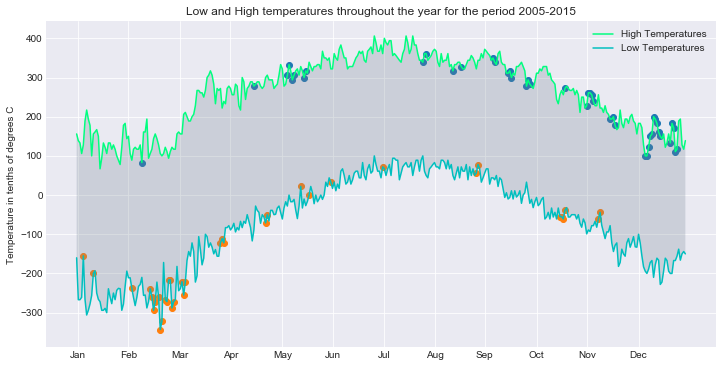

In [413]:
plt.figure(figsize=(12,6))
plt.plot(grouped_high['Data_Value'], c = 'springgreen')
plt.plot(grouped_low['Data_Value'], c = 'c')
plt.scatter(df15_grouped_high.index,df15_grouped_high['Data_Value'])
plt.scatter(df15_grouped_low.index,df15_grouped_low['Data_Value'])

plt.style.use('seaborn-darkgrid')

# add a label to the x axis
#plt.xlabel('Month')
# add a label to the y axis
plt.ylabel('Temperature in tenths of degrees C')
# add a title
plt.title('Low and High temperatures throughout the year for the period 2005-2015')

# add a legend (uses the labels from plt.scatter)
plt.legend(['High Temperatures','Low Temperatures'],loc=1, frameon=False)

#Fill space between graphs
plt.gca().fill_between(range(len(grouped_low['Data_Value'])), 
                       grouped_low['Data_Value'], grouped_high['Data_Value'], 
                       facecolor='slategrey', 
                       alpha=0.25)
# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='False', bottom='True', left='True', right='False', labelleft='True', labelbottom='True')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

#set Xticks labels 
# first set the new ticks for the positions of the monthly labels
ax = plt.gca()
ax.set_xticks(pos)
# set the labels
ax.set_xticklabels(months)
    
plt.show()